#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [3]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

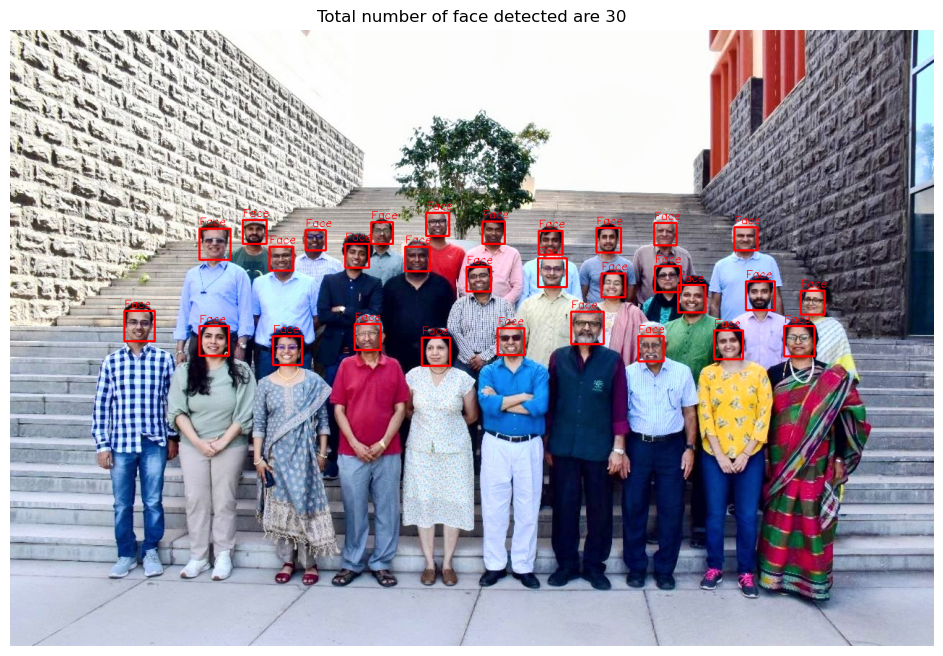

In [5]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = f"Total number of face detected are {len(faces_rect)}" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (255, 0, 0)  ## Text color (Red for matplotlib)
font_thickness = 1  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, "Face", (x, y-5), font, font_scale, (0, 0, 255), font_thickness)
    
## Display the image in the notebook
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(text)
plt.axis('off')
plt.show()

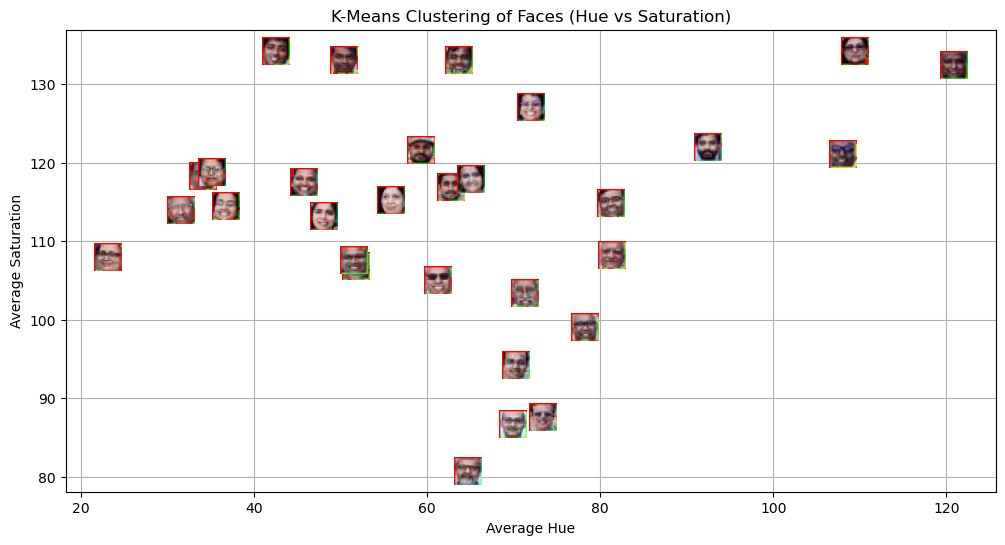

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, n_init='auto').fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
## Put x label
plt.xlabel('Average Hue')
## Put y label
plt.ylabel('Average Saturation')
## Put title
plt.title('K-Means Clustering of Faces (Hue vs Saturation)')
## Put grid
plt.grid(True)
## show the plot
plt.show()

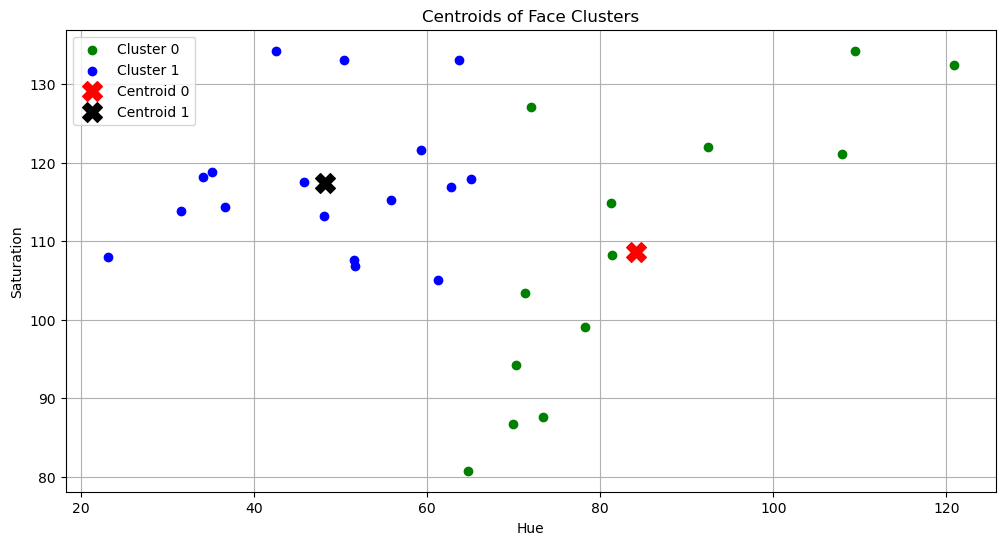

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Centroids of Face Clusters')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

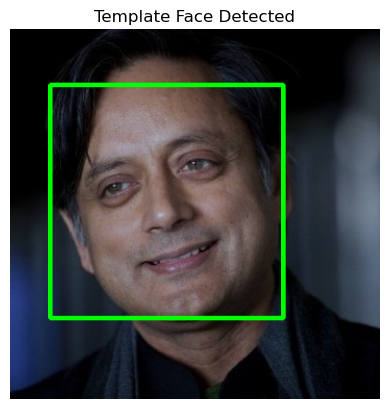

In [11]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display in notebook
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
plt.title('Template Face Detected')
plt.axis('off')
plt.show()     

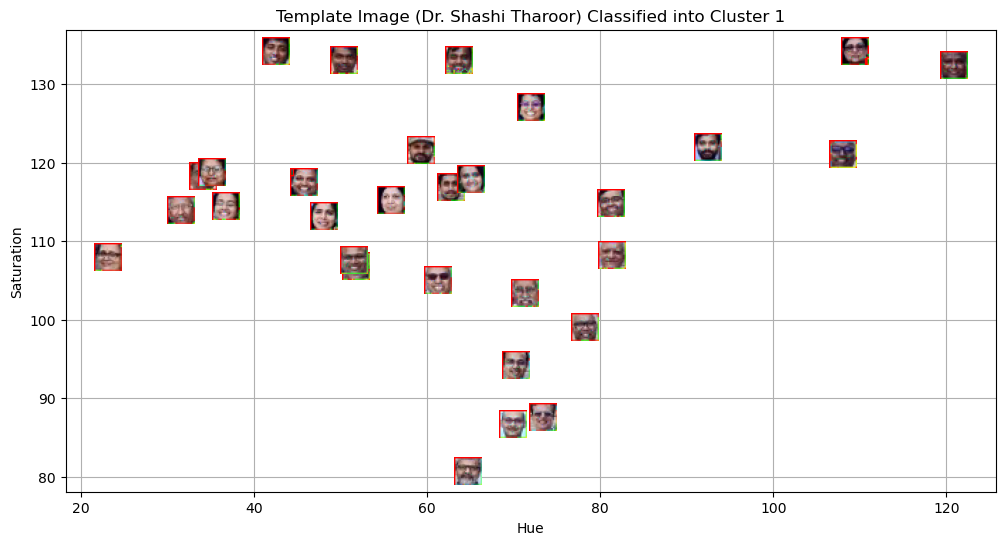

In [13]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
for (x, y, w, h) in template_faces:
    template_face_roi = template_hsv[y:y+h, x:x+w]
    template_hue = np.mean(template_face_roi[:, :, 0])
    template_saturation = np.mean(template_face_roi[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot clustered faces with images (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'green' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title(f'Template Image (Dr. Shashi Tharoor) Classified into Cluster {template_label}')
## Add grid
plt.grid(True)
## show plot
plt.show()

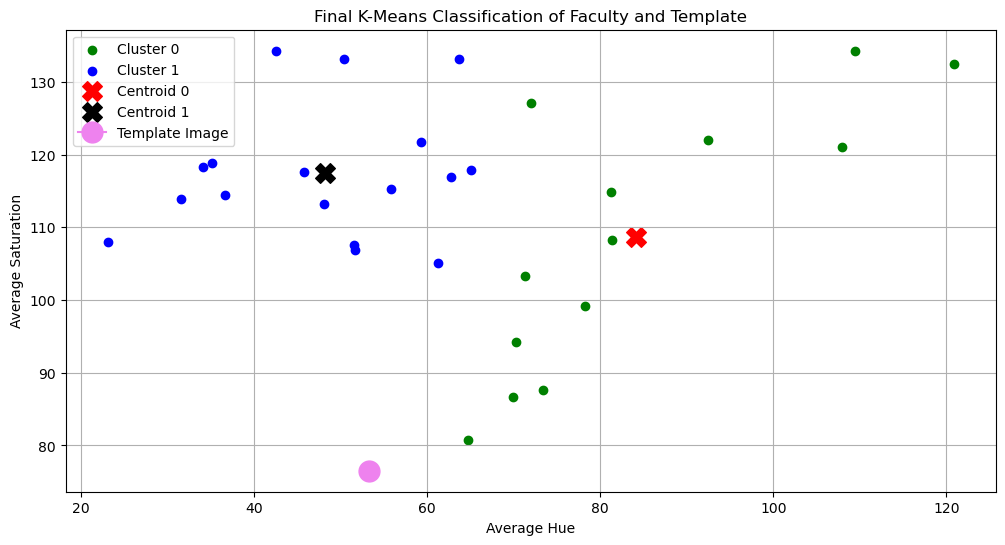

In [21]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0: 
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else: 
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1])) 

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points) 
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')
# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1') 

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1] 

## plot for centroid 0
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0') 
## plot for centroid 1
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1') 

# Plot the template point
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=15, label='Template Image') 

## Put x label
plt.xlabel('Average Hue') 
## Put y label
plt.ylabel('Average Saturation') 
## Put title
plt.title('Final K-Means Classification of Faculty and Template') 
## Add a legend
plt.legend() 
## Add grid
plt.grid(True)
## show the plot
plt.show() 

## Report:
## Answer the following questions within your report:


### 1. Common Distance Metrics
The most common distance metrics used in classification algorithms are Euclidean distance, Manhattan distance, and Minkowski distance . For categorical or binary data, Hamming distance is also frequently used.

### 2. Real-World Applications
Distance-based algorithms are widely used in recommendation systems. They are also essential in medical diagnosis, where patient symptoms are compared to historical cases to identify conditions.

### 3. Explanation of Distance Metrics
Euclidean distance calculates the shortest path between two points, like a ruler connecting them directly. Manhattan distance measures distance along axes at right angles, while Cosine similarity measures the angle between two vectors, focusing on orientation rather than magnitude.

### 4. Role of Cross-Validation
Cross-validation evaluates a model's ability to generalize to unseen data by splitting the dataset into multiple training and testing folds. This process helps detect overfitting and allows for reliable hyperparameter tuning (like finding the best 'k' in KNN) to ensure consistent performance.

### 5. Variance and Bias in Terms of KNN
In KNN, a small 'k' (e.g., k=1) leads to high variance and overfitting because the model captures noise and outliers. Conversely, a large 'k' leads to high bias and underfitting because the model oversimplifies the decision boundary, ignoring local data patterns.